# Exploring Data Analysis For IMDB 50k Movie Reviews Dataset

##afasga

In [2]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import string, re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
data = data.drop_duplicates()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


<Axes: xlabel='sentiment', ylabel='count'>

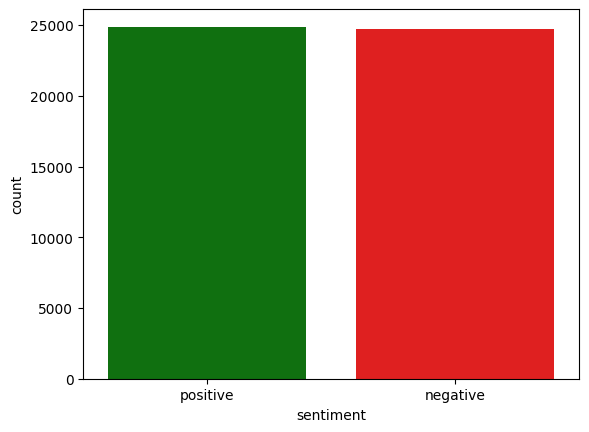

In [8]:
sns.countplot(x="sentiment", data=data, palette={"positive":"green", "negative":"red"})

In [10]:
#stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
#stop.update(punctuation)

In [11]:
#HTML etiketlerinin kaldırılması.
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Köşeli parantezlerin çıkarılması.
def remove_between_square_brackets(text):
    return re.sub('[]]∗[^]]*', '', text)
    
#URL'lerin kaldırılması.
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
    
#Gereksiz kelimelerin (stopwords) kaldırılması.
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    #text = remove_stopwords(text)
    return text

data['review'] = data['review'].apply(denoise_text)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [18]:
data.sentiment.replace("positive" , 1 , inplace = True)
data.sentiment.replace("negative" , 0 , inplace = True)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


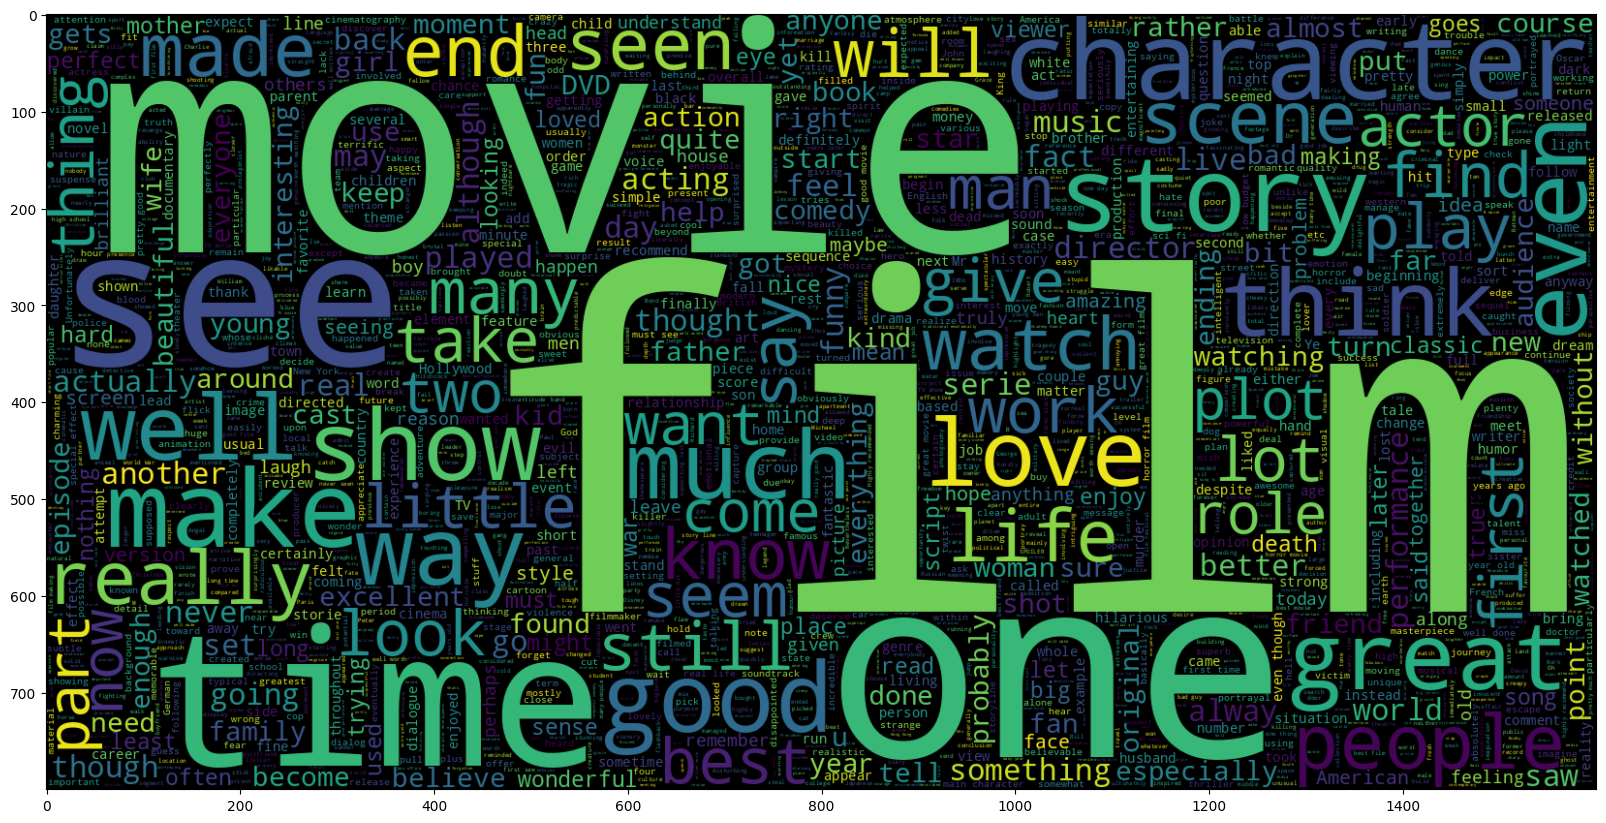

In [19]:
def show_wordCloud(sentiment):
    plt.figure(figsize = (20,20))
    wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == sentiment].review))
    plt.imshow(wc , interpolation = 'bilinear')
    
show_wordCloud(1)

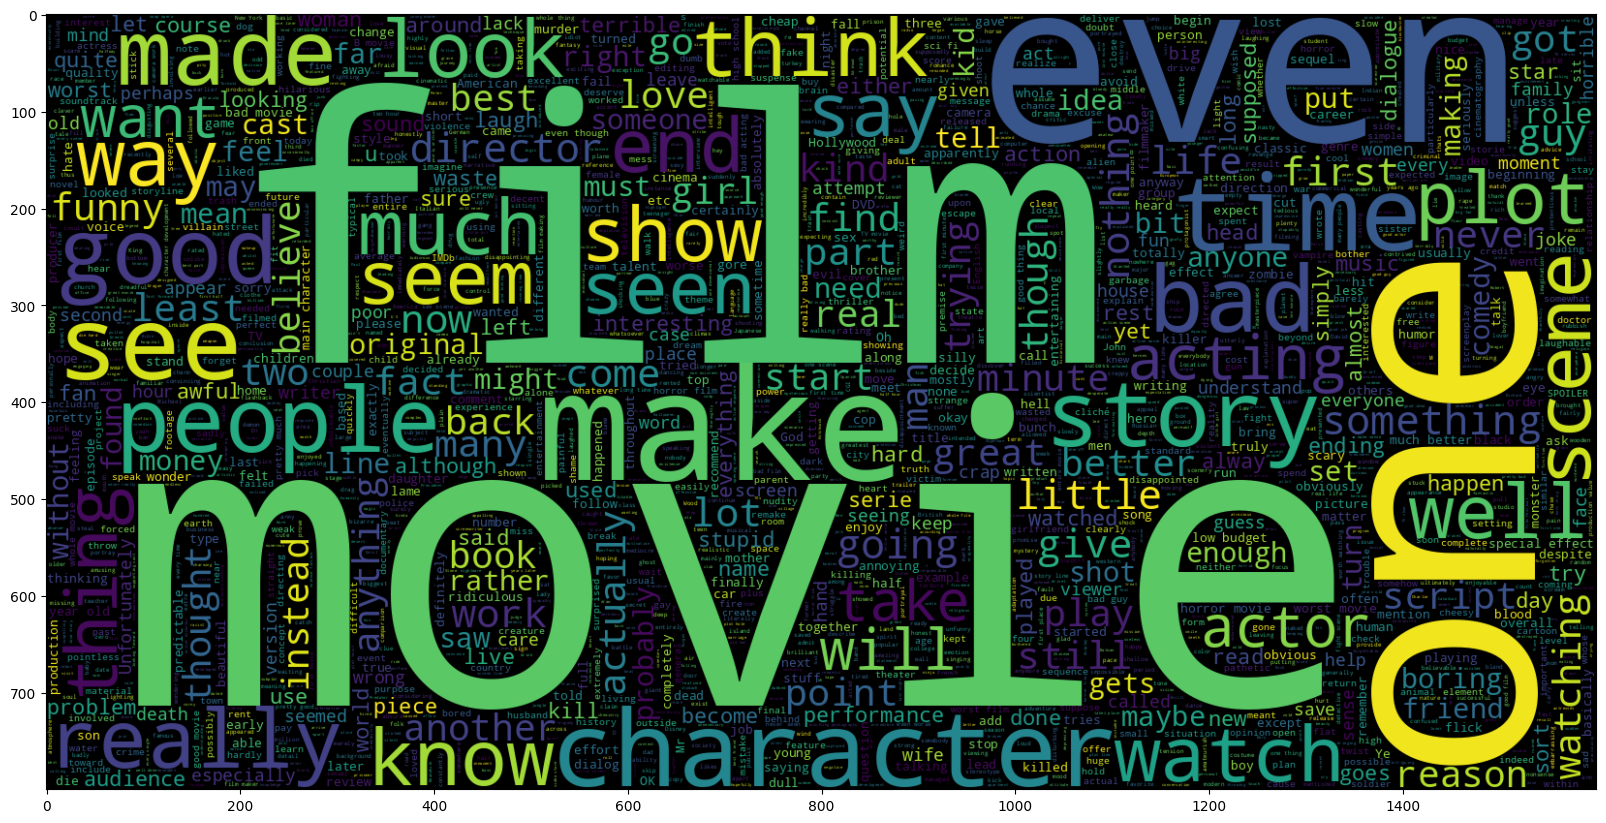

In [21]:
show_wordCloud(0)

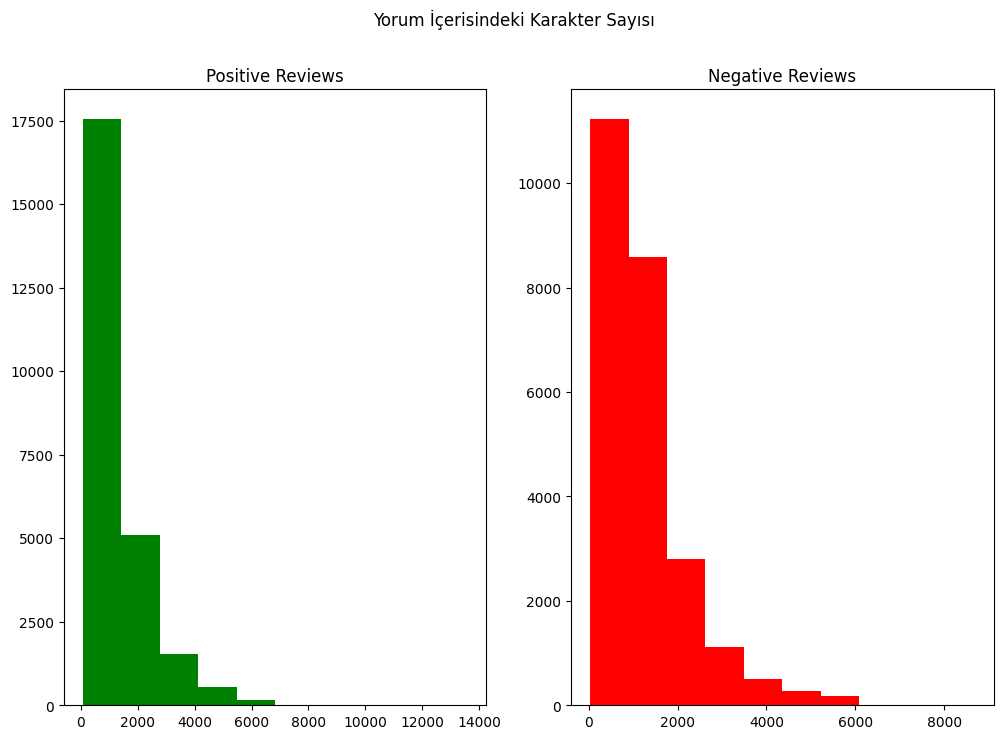

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,8))
text_len = data[data['sentiment'] == 1]['review'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
text_len = data[data['sentiment'] == 0]['review'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
fig.suptitle('Yorum İçerisindeki Karakter Sayısı')
plt.show()

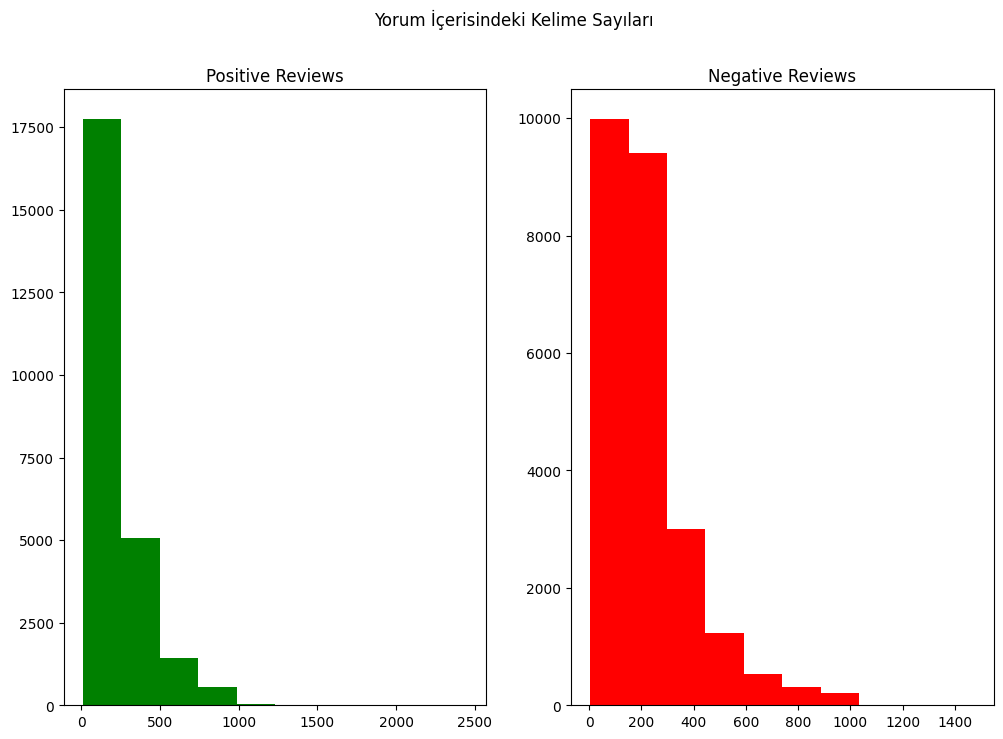

In [24]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,8))
text_len = data[data['sentiment'] == 1]['review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
text_len = data[data['sentiment'] == 0]['review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
fig.suptitle('Yorum İçerisindeki Kelime Sayıları')
plt.show()

Text(0.5, 0.98, 'Her Yorum İçin Ortalama Kelime Sayıları')

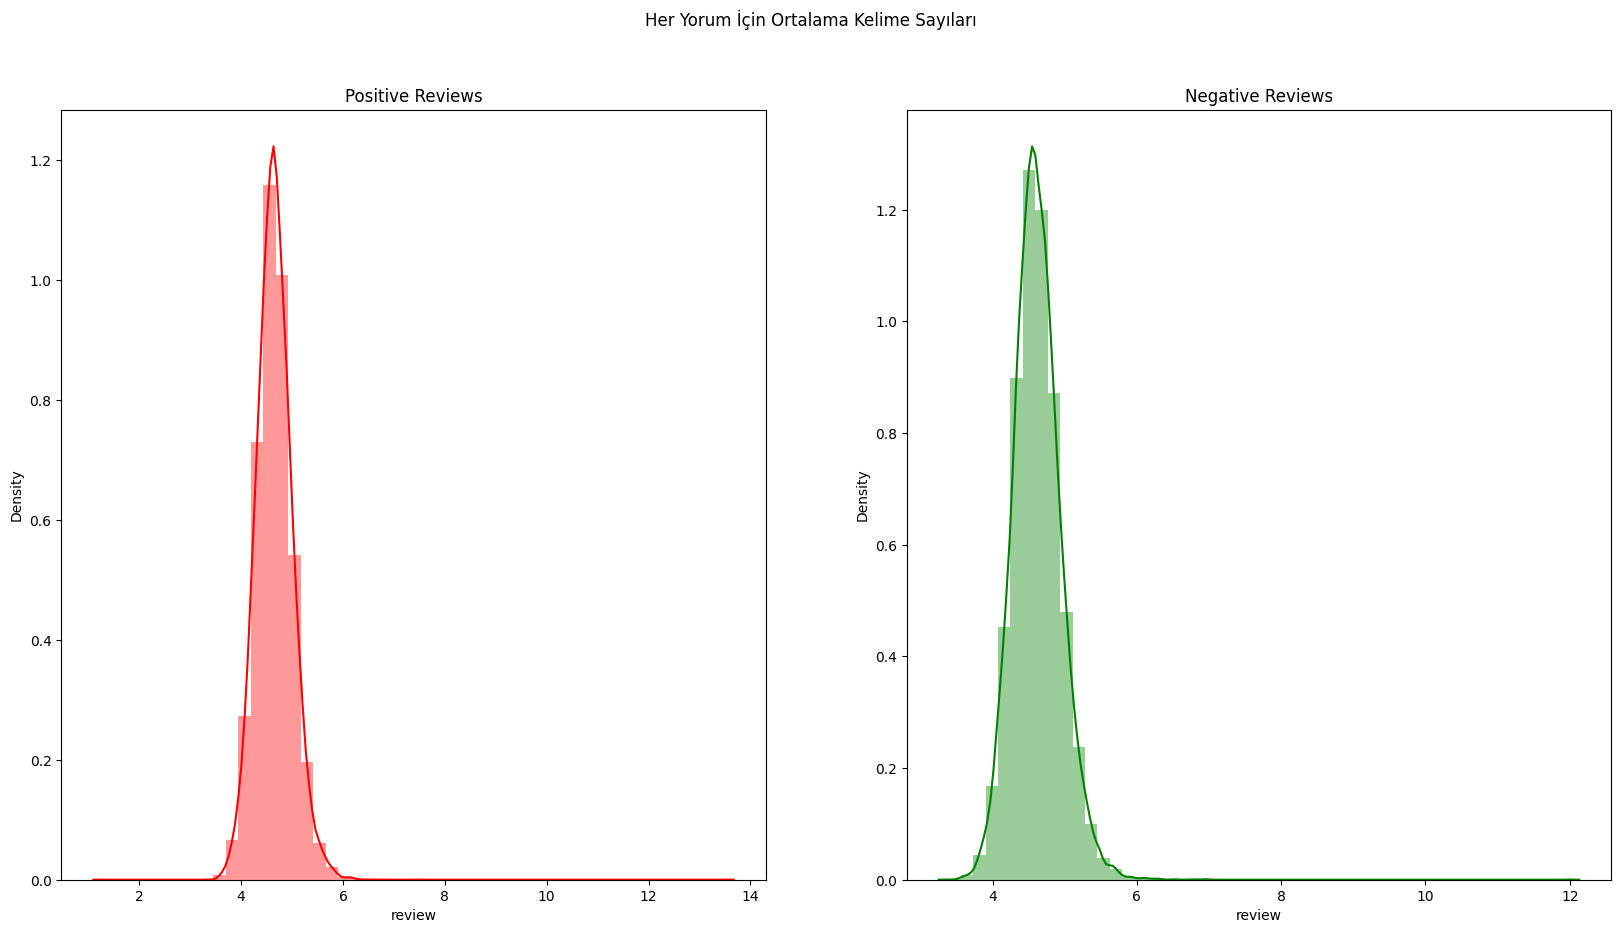

In [25]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
word = data[data['sentiment'] == 1]['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Positive Reviews')
word = data[data['sentiment'] == 0]['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Negative Reviews')
fig.suptitle('Her Yorum İçin Ortalama Kelime Sayıları')

In [26]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(data.review)
corpus[:5]

['One', 'of', 'the', 'other', 'reviewers']

In [27]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'the': 564497,
 'a': 304820,
 'and': 299772,
 'of': 281598,
 'to': 259896,
 'is': 201675,
 'in': 168740,
 'I': 132228,
 'that': 125878,
 'this': 112824}

In [28]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

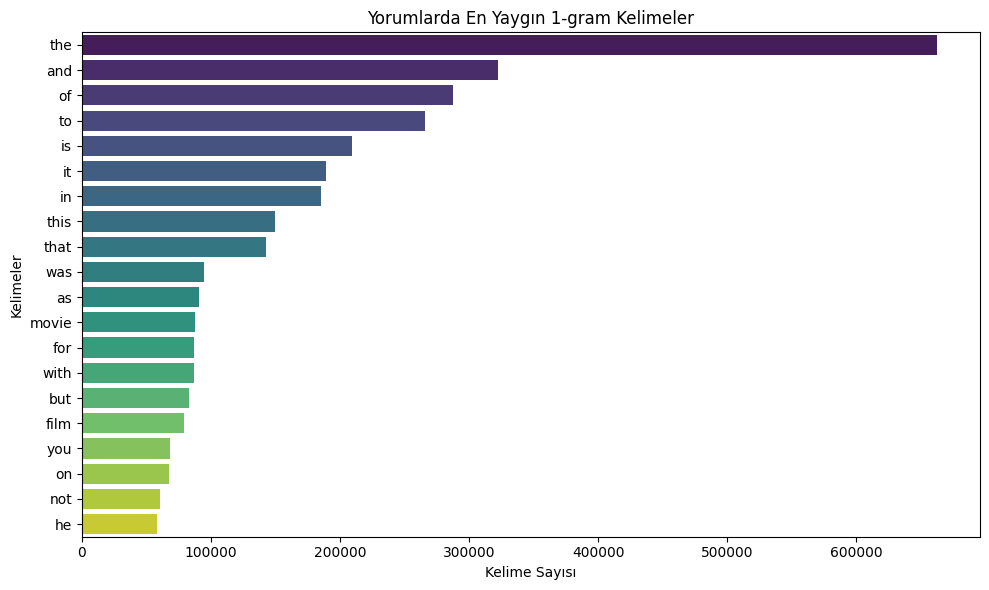

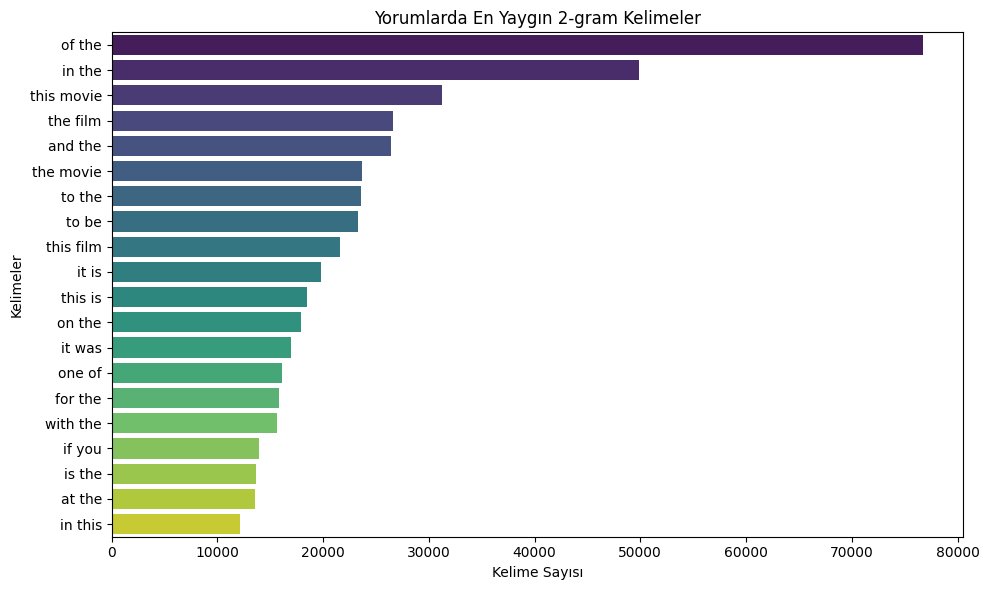

In [29]:
for g in range(1, 3):
    most_common = get_top_text_ngrams(data["review"], 20, g)
    temp_df = pd.DataFrame(most_common, columns=["Yaygın_Kelimeler", "Kelime_Sayısı"])

    plt.figure(figsize=(10, 6))
    sns.barplot(data=temp_df, x="Kelime_Sayısı", y="Yaygın_Kelimeler", palette="viridis")
    plt.title(f"Yorumlarda En Yaygın {g}-gram Kelimeler")
    plt.xlabel("Kelime Sayısı")
    plt.ylabel("Kelimeler")
    plt.tight_layout()
    plt.show()

In [30]:
data.to_csv('cleaned-imdb-dataset.csv', index=False)